# Trabajar el dataset

In [1]:
#!pip install tensorflow
#!pip install keras
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd

#splits = {'train': 'train.parquet', 'validation': 'validation.parquet', 'test': 'test.parquet'}
#df = pd.read_parquet("hf://datasets/cornell-movie-review-data/erotten_tomatos/" + splits["train"])

# Leer el dataset local
df = pd.read_csv('dataset/dataset_procesado.csv')

# df = pd.read_csv('/content/TestReviews.csv')
# df
# 0 negativo
# 1 positivo

In [3]:
df["label"].unique()

array([1, 0])

In [4]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df['text_procesado'], df['label'], test_size=0.2, random_state=42)



# Ahora puedes usar train_df para entrenar y test_df para evaluar tu modelo
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))



Tamaño del conjunto de entrenamiento: 6824
Tamaño del conjunto de prueba: 1706


# Ejemplo con random forest

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Vectorización usando TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entrenar el modelo RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Ajusta n_estimators según sea necesario
rf_classifier.fit(X_train_vec, y_train)

# Predicciones
y_pred = rf_classifier.predict(X_test_vec)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Sensibilidad (Recall): {recall}")
print(f"Puntuación F1: {f1}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

# Ejemplo con Naive Bayes

In [ ]:


from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Vectorización usando CountVectorizer (para Naive Bayes)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entrenar el modelo Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Predicciones
y_pred = nb_classifier.predict(X_test_vec)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Sensibilidad (Recall): {recall}")
print(f"Puntuación F1: {f1}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

# Ejemplo de Arbol de decision DT

In [ ]:


from sklearn.tree import DecisionTreeClassifier

# Vectorización usando TF-IDF (puedes usar CountVectorizer también)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entrenar el modelo de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=42)  # Puedes ajustar hiperparámetros aquí
dt_classifier.fit(X_train_vec, y_train)

# Predicciones
y_pred = dt_classifier.predict(X_test_vec)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Sensibilidad (Recall): {recall}")
print(f"Puntuación F1: {f1}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

# Deep Learning

In [5]:
# Preprocesamiento del texto
tokenizer = Tokenizer(num_words=100) # Ajusta el número de palabras según tus datos
tokenizer.fit_on_texts(X_train)
secuencias = tokenizer.texts_to_sequences(X_train)
secuencias_padding = pad_sequences(secuencias)

# Definir el modelo LSTM
modelo = keras.Sequential([
    keras.layers.Embedding(100, 16, input_length=secuencias_padding.shape[1]),
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
modelo.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(secuencias_padding, y_train, epochs=5) # Ajusta el número de épocas según tus datos


d:\INACAP\2024 Ingenieria\8vo semestre\Machine Learning\Unidad 4\ML_Eva4\ML_Eva4\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5301 - loss: 0.6902
Epoch 2/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6306 - loss: 0.6487
Epoch 3/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6144 - loss: 0.6444
Epoch 4/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6273 - loss: 0.6410
Epoch 5/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6208 - loss: 0.6410


In [6]:
secuencias_padding

array([[ 0,  0,  0, ...,  0,  0, 24],
       [ 0,  0,  0, ...,  0,  0, 50],
       [ 0,  0,  0, ..., 99, 92, 55],
       ...,
       [ 0,  0,  0, ..., 66, 40, 36],
       [ 0,  0,  0, ...,  0,  0, 90],
       [ 0,  0,  0, ..., 97,  1,  8]], dtype=int32)

In [7]:
secuencia_nueva = tokenizer.texts_to_sequences(X_test)
secuencia_padding_nueva = pad_sequences(secuencia_nueva, maxlen=secuencias_padding.shape[1]) # Asegúrate de que tenga la misma longitud que las secuencias de entrenamiento
y_predict = modelo.predict(secuencia_padding_nueva)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Exactitud: 0.6066822977725674
Precisión: 0.6458658346333853
Sensibilidad (Recall): 0.4825174825174825
Puntuación F1: 0.552368245496998


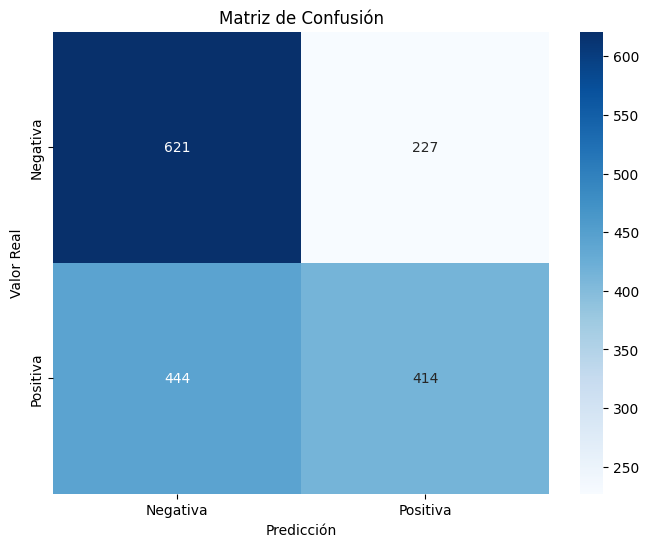

In [8]:

import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir las probabilidades predichas a clases (0 o 1)
y_pred_classes = (y_predict > 0.5).astype(int)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Sensibilidad (Recall): {recall}")
print(f"Puntuación F1: {f1}")


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()



In [9]:
import onnxruntime as ort

onnx_session = ort.InferenceSession('models/lstm_model.onnx')
input_info = onnx_session.get_inputs()[0]
print("Input name:", input_info.name)
print("Input shape:", input_info.shape)
print("Input type:", input_info.type)


Input name: input_layer
Input shape: ['unk__264', 100]
Input type: tensor(float)
